In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#expands all columns in datafrae
pd.options.display.max_columns = None

#gets rid of SettingWithCopyWarning:
pd.options.mode.chained_assignment = None

In [2]:
#import the data
data = pd.read_json("data/data.json")

In [3]:
data.head(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC


In [4]:
#number of features
print ("There are {} features.".format(data.shape[1]))

There are 44 features.


In [5]:
#number of datapoints
print ("there are {} datapoints.".format(data.shape[0]))

there are 14337 datapoints.


### Create Label

In [6]:
data.acct_type.unique()

array(['fraudster_event', 'premium', 'spammer_warn', 'fraudster',
       'spammer_limited', 'spammer_noinvite', 'locked', 'tos_lock',
       'tos_warn', 'fraudster_att', 'spammer_web', 'spammer'],
      dtype=object)

In [7]:
#add a new column called "Fraud"
#True if any acct_type field contains the word fraud
#False if it does not contain it
data["Fraud"] = data.acct_type.str.contains("fraud", regex = True).astype(int)

In [8]:
#this will be our target
label = data["Fraud"]

## Feature Engineering / EDA

#### ACH or Check?

In [9]:
#unique payout types
data.payout_type.unique()

array(['', 'CHECK', 'ACH'], dtype=object)

In [10]:
#create dummies for payout type
payout_type = pd.get_dummies(data.payout_type)

In [11]:
#combine both dataframes
data = data.join(payout_type)

In [12]:
data.sample(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud,,ACH,CHECK
4856,premium,1364277600,2624,8,US,USD,1.0,"<p style=""text-align: center;""><span style=""fo...",sara-tx.org,1363299750,1363845600,1.363301e+09,1363273200,0,4225.00,0,0.0,1,y,Low Impact Development Design Competition,41,16,2,5841041,,0.0,SA Land/Water Sustainability Forum & San Anton...,0.0,,ACH,"[{'name': '', 'created': '2012-12-05 03:13:50'...",0.0,0,0,"[{'event_id': 5841041, 'cost': 235.26, 'availa...",672,1305205654,4,,None,NaN,NaN,None,None,0,0,1,0
13217,premium,1353015000,1917,8,US,USD,0.0,"<p><br /> <a href=""http://www.brooklynmeditati...",gmail.com,1348777733,1352583000,1.348778e+09,1352572200,0,66.27,0,0.0,1,y,Learn to Meditate in Half a Day,31,3,34,4454974,"<p><span style=""font-family: helvetica;""><stro...",26.0,Vajradhara Meditation Center,16.0,,ACH,"[{'name': '', 'created': '2011-03-08 00:00:00'...",44.0,44,1,"[{'event_id': 4454974, 'cost': 20.0, 'availabi...",1052,1257873391,3,235 St. Marks Avenue,US,40.678502,-73.967815,Vajradhara Meditation Center,NY,0,0,1,0


#### what kind of headers do they have?

In [13]:
data.has_header.unique()

array([ 1.,  0., nan])

In [14]:
#replace NaNs in column has_header with 0
data.has_header = data.has_header.fillna(value = 0)

In [15]:
data.has_header.value_counts()

0.0    12533
1.0     1804
Name: has_header, dtype: int64

In [16]:
with_headers = data.has_header.value_counts()[1]
without_headers = data.has_header.value_counts()[0]

In [17]:
percent_with_headers = with_headers/data.shape[0]*100
percent_without_headers = without_headers/data.shape[0]*100

In [18]:
print ("{}% of the events have headers.".format(percent_with_headers))
print ("{}% of the events do not have headers.".format(percent_without_headers))

12.582827648741018% of the events have headers.
87.41717235125897% of the events do not have headers.


(array([1768.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          36.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

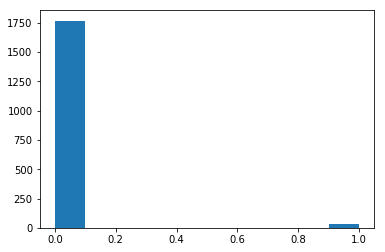

In [19]:
plt.hist(data.Fraud[data.has_header == True])

(array([11276.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1257.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

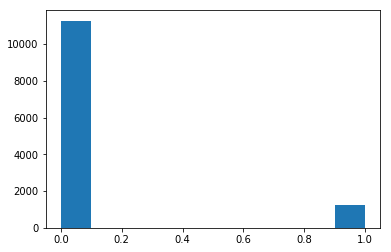

In [20]:
plt.hist(data.Fraud[data.has_header == False])

#### logo

In [21]:
data.has_logo.value_counts()

1    12073
0     2264
Name: has_logo, dtype: int64

In [22]:
logo = data.has_logo.value_counts()[1]
no_logo = data.has_logo.value_counts()[0]

In [23]:
percent_with_logo = logo/data.shape[0]*100
percent_without_logo = no_logo/data.shape[0]*100

In [24]:
percent_with_logo

84.2086908000279

In [25]:
percent_without_logo

15.791309199972101

(array([11238.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,   835.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

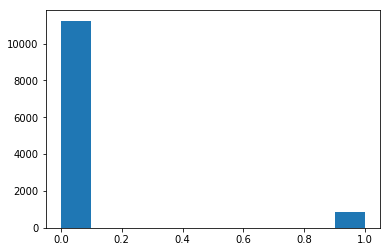

In [26]:
plt.hist(data.Fraud[data.has_logo == True])

(array([1806.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         458.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

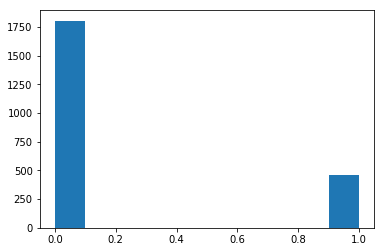

In [27]:
plt.hist(data.Fraud[data.has_logo == False])

#### description feature

In [28]:
#what's in the decription for the first event?
data.description.iloc[0]

'<p><a href="http://s432.photobucket.com/albums/qq49/digusonline/?action=view&amp;current=supersunday.jpg" target="_blank"><img src="http://i432.photobucket.com/albums/qq49/digusonline/supersunday.jpg" border="0" alt="Photobucket" /></a></p>\r\n<p>\xa0</p>\r\n<p style="text-align: center;"><font size="3"><strong>Party Starz Entertaintment &amp; Diverse International Group Presents...<br /></strong></font><br /><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>The Official\xa0"99 Hour No Sleep" Super Bowl </strong></font></p>\r\n<p style="text-align: center;"><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Weekend </strong></font><font face="tahoma,arial,helvetica,sans-serif" size="4"><strong>Grand Finale</strong></font></p>\r\n<p><br /><span style="font-family: Times New Roman,serif;"><font size="3"><font face="tahoma,arial,helvetica,sans-serif">No matter who wins or loses, this post-game party cannot be missed! Enjoy the drink specials and all night music

In [29]:
from bs4 import BeautifulSoup
import re

In [30]:
#Parse the HTML tags
test_soup = BeautifulSoup(data.description.iloc[0]).text.replace("\xa0", " ").replace("\n", " ").lower()

In [31]:
test_soup

'   party starz entertaintment & diverse international group presents...the official "99 hour no sleep" super bowl  weekend grand finale no matter who wins or loses, this post-game party cannot be missed! enjoy the drink specials and all night music! the ultimate "99 no sleep" super bowl weekend grand finale! sunday, february 7th, 2010 @ ink nightclub-south beach (717 washington ave, miami bch, fl 33139). hosted by 99 jamz with special appearances by fast life youngstaz. special invited guests: billy blue, dorrough and brisco and with performances by various artist\'s and many many more at south beach miami\'s finest venue! this is a party you have to see to believe! this is everyone\'s last chance to make that impression, so don\'t half-step, bring your "a" game and party with all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building! dj q & dj slym will ber keepig the party jumping til the sun comes up with the hottest hip-hop, r

In [32]:
#create a column called "parsed_desc"
#which stores the parsed descriptions for each event
data['parsed_desc'] = 1
for n in range(data.shape[0]):
    soup = BeautifulSoup(data.description.iloc[n]).text.replace("\xa0", " ").replace("\n", " ").lower()
    data["parsed_desc"].iloc[n] = soup
#     data["parsed_desc"].iloc[n] = soup.translate(str.maketrans('','',string.punctuation))


In [33]:
#checking to see if it parsed the original desription
data.parsed_desc.iloc[1]

"join us for a quick, one-night, community-building trip to charleston, sc. cost: the trip costs a total of $35, which includes breakfast and lunch on saturday and housing. you will be responsible to pay for your own dinner on friday and saturday. early bird tickets are available until noon on january 20 and include a great winter getaway t-shirt. so don't wait to register! registration ends at noon on january 27. a very limited number of scholarships are available. contact your campus minister as soon as possible to see if you qualify. transportation: we are working to secure two fifteen passenger buses, which will be filled on a first-come, first-served basis. payment must be received before a slot on a bus can be reserved. you will be responsible for your own transportation if a bus slot is not available. what to bring: we will be staying in the gym of metro north presbyterian church in goose creek, sc, and showering (maybe) at various members homes. you will want to bring an air ma

In [34]:
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

In [35]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/michellehoang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/michellehoang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/michellehoang/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

###### manually tokenize, and remove punctuation/stop words

In [36]:
import string

In [37]:
#identify all punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [38]:
#remove all punctuations
test_soup = test_soup.translate(str.maketrans('', '', string.punctuation))

In [39]:
test_soup

'   party starz entertaintment  diverse international group presentsthe official 99 hour no sleep super bowl  weekend grand finale no matter who wins or loses this postgame party cannot be missed enjoy the drink specials and all night music the ultimate 99 no sleep super bowl weekend grand finale sunday february 7th 2010  ink nightclubsouth beach 717 washington ave miami bch fl 33139 hosted by 99 jamz with special appearances by fast life youngstaz special invited guests billy blue dorrough and brisco and with performances by various artists and many many more at south beach miamis finest venue this is a party you have to see to believe this is everyones last chance to make that impression so dont halfstep bring your a game and party with all of the hottest artists celebrities models and superstar athletes that are guaranteed to be in the building dj q  dj slym will ber keepig the party jumping til the sun comes up with the hottest hiphop rb reggae old school and more  doors open  10pm

In [40]:
data.head(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud,,ACH,CHECK,parsed_desc
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,1265630400,1.263110e+09,1265594400,0,0.00,0,1.0,0,y,"99 HOUR ""NO SLEEP"" SUPER BOWL CELEBRITY WEEKEN...",60,0,0,527017,,0.0,Party Starz Ent & Diverse Int'l Group,0.0,,,[],29.0,33,1,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,1,0,0,party starz entertaintment & diverse intern...
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,1296288000,1.293833e+09,1296255600,0,868.02,0,0.0,1,n,Winthrop RUF Winter Getaway,27,23,1,786878,"<p>Since 1987, RUF has ministered to students ...",0.0,RUF at Winthrop University,12.0,RUF,CHECK,"[{'name': 'RUF', 'created': '2010-10-01 01:10:...",28.0,28,0,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0,0,0,1,"join us for a quick, one-night, community-buil..."


In [41]:
#most common stop words in nltk
stop_words = set(nltk.corpus.stopwords.words('english'))

In [42]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [43]:
len(data.parsed_desc.iloc[0])

1478

In [44]:
desc_no_punc_or_stops = []
for word in data.parsed_desc.iloc[0].split():
    word = word.translate(str.maketrans('', '', string.punctuation))
    if word not in stop_words:
        desc_no_punc_or_stops.append(word)

In [45]:
desc_no_punc_or_stops

['party',
 'starz',
 'entertaintment',
 '',
 'diverse',
 'international',
 'group',
 'presentsthe',
 'official',
 '99',
 'hour',
 'sleep',
 'super',
 'bowl',
 'weekend',
 'grand',
 'finale',
 'matter',
 'wins',
 'loses',
 'postgame',
 'party',
 'cannot',
 'missed',
 'enjoy',
 'drink',
 'specials',
 'night',
 'music',
 'ultimate',
 '99',
 'sleep',
 'super',
 'bowl',
 'weekend',
 'grand',
 'finale',
 'sunday',
 'february',
 '7th',
 '2010',
 '',
 'ink',
 'nightclubsouth',
 'beach',
 '717',
 'washington',
 'ave',
 'miami',
 'bch',
 'fl',
 '33139',
 'hosted',
 '99',
 'jamz',
 'special',
 'appearances',
 'fast',
 'life',
 'youngstaz',
 'special',
 'invited',
 'guests',
 'billy',
 'blue',
 'dorrough',
 'brisco',
 'performances',
 'various',
 'artists',
 'many',
 'many',
 'south',
 'beach',
 'miamis',
 'finest',
 'venue',
 'party',
 'see',
 'believe',
 'everyones',
 'last',
 'chance',
 'make',
 'impression',
 'dont',
 'halfstep',
 'bring',
 'game',
 'party',
 'hottest',
 'artists',
 'celebriti

In [46]:
#remove punctuation and stopwords for each event and store it in
#column called "parsed_desc_no_punc_or_stops"
data["parsed_desc_no_punc_or_stops"] = ""
for i in range(data.shape[0]):
    desc_no_punc_or_stops = []
    doc = data.parsed_desc.iloc[i]\
                .translate(str.maketrans('', '', string.punctuation))
    for word in doc.split():
        if word not in stop_words:
            desc_no_punc_or_stops.append(word)
    
    data.parsed_desc_no_punc_or_stops.iloc[i] = ' '.join(desc_no_punc_or_stops)

In [47]:
data.parsed_desc_no_punc_or_stops.iloc[0]

'party starz entertaintment diverse international group presentsthe official 99 hour sleep super bowl weekend grand finale matter wins loses postgame party cannot missed enjoy drink specials night music ultimate 99 sleep super bowl weekend grand finale sunday february 7th 2010 ink nightclubsouth beach 717 washington ave miami bch fl 33139 hosted 99 jamz special appearances fast life youngstaz special invited guests billy blue dorrough brisco performances various artists many many south beach miamis finest venue party see believe everyones last chance make impression dont halfstep bring game party hottest artists celebrities models superstar athletes guaranteed building dj q dj slym ber keepig party jumping til sun comes hottest hiphop rb reggae old school doors open 10pm ladies 18 21 gents 241 drinks 1am plus best bottle specials night long offering super bowl game ticket stub discounts night dress code enforced wear wear allnight drink specials information table reservations email 99h

###### Use sklearn's TfidVectorizer and CountVectorizer to remove punctuation and stopwords

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [49]:
corpus = data.parsed_desc.tolist()

In [50]:
corpus

['   party starz entertaintment & diverse international group presents...the official "99 hour no sleep" super bowl  weekend grand finale no matter who wins or loses, this post-game party cannot be missed! enjoy the drink specials and all night music! the ultimate "99 no sleep" super bowl weekend grand finale! sunday, february 7th, 2010 @ ink nightclub-south beach (717 washington ave, miami bch, fl 33139). hosted by 99 jamz with special appearances by fast life youngstaz. special invited guests: billy blue, dorrough and brisco and with performances by various artist\'s and many many more at south beach miami\'s finest venue! this is a party you have to see to believe! this is everyone\'s last chance to make that impression, so don\'t half-step, bring your "a" game and party with all of the hottest artists, celebrities, models and superstar athletes that are guaranteed to be in the building! dj q & dj slym will ber keepig the party jumping til the sun comes up with the hottest hip-hop, 

In [51]:
#instantiate TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (2,2),\
                             min_df=0.005, \
                             max_df=0.5, \
                             max_features=50, \
                             stop_words ="english",\
                             token_pattern='\S+')
tfidf = vectorizer.fit_transform(corpus)

In [52]:
#get a list of the feature names
print(vectorizer.get_feature_names())

['6:00 pm', '7:00 pm', 'best practices', 'bring printed', 'business development', 'business owners', 'buy tickets', 'cash bar', 'come join', 'credit card', "don't miss", 'doors open', 'early bird', 'feel free', 'forward seeing', 'general admission', 'high school', 'information, contact', 'let know', 'live music', 'look forward', 'los angeles', 'make sure', 'networking event', 'new york', 'new york,', 'open bar', 'parking available', 'pm -', 'price includes', 'printed ticket', 'proceeds benefit', 'purchase tickets', 'real estate', 'registration fee', 'san francisco', 'silent auction', 'small business', 'social media', 'special guest', 'ticket price', 'ticket sales', 'tickets available', 'tickets purchased', 'tickets sold', 'united states', 'vice president', 'wide range', 'years experience', 'young people']


In [53]:
#convert into a matrix
tfidf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [54]:
#identifying the top features
sort_feat = np.argsort(tfidf.toarray()).flatten()[::-1]

In [55]:
#array of feature names
feat_names = np.array(vectorizer.get_feature_names())

In [56]:
#top 10 features we want to incorporate into our model
n=20
top_features = feat_names[sort_feat][:n]

In [57]:
top_features

array(['young people', 'early bird', 'make sure', 'los angeles',
       'look forward', 'live music', 'let know', 'information, contact',
       'high school', 'general admission', 'forward seeing', 'feel free',
       'doors open', 'years experience', "don't miss", 'credit card',
       'come join', 'cash bar', 'buy tickets', 'business owners'],
      dtype='<U20')

In [58]:
#create a dataframe of the tfidf vector
tfidf_vect = pd.DataFrame(tfidf.toarray(), \
                          columns = vectorizer.get_feature_names())

In [59]:
#combine the 2 data frames
data_vect = data.join(tfidf_vect)

In [60]:
data_vect.sample(10)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud,,ACH,CHECK,parsed_desc,parsed_desc_no_punc_or_stops,6:00 pm,7:00 pm,best practices,bring printed,business development,business owners,buy tickets,cash bar,come join,credit card,don't miss,doors open,early bird,feel free,forward seeing,general admission,high school,"information, contact",let know,live music,look forward,los angeles,make sure,networking event,new york,"new york,",open bar,parking available,pm -,price includes,printed ticket,proceeds benefit,purchase tickets,real estate,registration fee,san francisco,silent auction,small business,social media,special guest,ticket price,ticket sales,tickets available,tickets purchased,tickets sold,united states,vice president,wide range,years experience,young people
3187,premium,1344149700,13962,8,PR,USD,1.0,"<p style=""font-size: 11px; line-height: 1.5em;...",gmail.com,1340129700,1343717700,1.340133e+09,1343660400,1,249.00,1,0.0,1,y,Programas para la Certificación de Mediación -...,57,1,1,3763784,"<p>Mediación, Conssultoría y Adiestramiento.</...",16.0,Urban Solutions Inc.,16.0,,ACH,"[{'name': '', 'created': '2012-04-08 03:12:17'...",41.0,41,0,"[{'event_id': 3763784, 'cost': 1250.08, 'avail...",122,1329583019,4,Calle José Canals #458,PR,18.416836,-66.065670,,,0,0,1,0,participa de nuestros adiestramientos para ...,participa de nuestros adiestramientos para la ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1470,premium,1380862800,3813,0,US,USD,0.0,"<p style=""text-align: center;""><img alt="""" wi...",mcilveenfamilylaw.com,1375905750,1380430800,1.375907e+09,1380420000,0,318.48,0,0.0,1,y,Toast Of The Town,17,1,0,7768319,,0.0,Mcilveen Family,0.0,,ACH,"[{'name': '', 'created': '2013-10-03 03:15:02'...",52.0,52,1,"[{'event_id': 7768319, 'cost': 150.0, 'availab...",0,1375905749,1,4521 Sharon Rd,US,35.150710,-80.828778,Wall Street Capitol Building,NC,0,0,1,0,mcilveen family law presents our 1st annu...,mcilveen family law presents 1st annual wine a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6758,premium,1362103200,1043,10,US,USD,1.0,<p>The Zombie Run and Shoot is a biathlon in w...,yahoo.com,1352773401,1361671200,1.354108e+09,1361635200,0,5537.48,0,0.0,1,y,Zombie Run and Shoot,20,44,5,4813435,"<p><span>Let’s face it, most of us are not Eli...",0.0,BattleRoadUSA.com,0.0,,ACH,"[{'name': '', 'created': '2012-09-21 03:15:44'...",87.0,103,1,"[{'event_id': 4813435, 'cost': 100.0, 'availab...",1347,1236367794,4,11968 FM 1915,,30.858854,-97.131708,Battle Road USA,,0,0,1,0,the zombie run and shoot is a biathlon in whic...,zombie run shoot biathlon participants may run...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1512,premium,1296784800,170,0,US,USD,0.0,"<p><font size=""4"">Registration: 8AM<...",mac.com,1294530637,1296352800,1.294531e+09,1296320400,0,2115.86,0,0.0,0,y,Los Angeles Bootcamp,20,55,1,1183199,,0.0,"Hosted by CieAura Lead Marketer, Black Diamond...",0.0,,ACH,"[{'name': '', 'created': '2011-01-29 01:12:29'...",21.0,21,1,"[{'event_id': 1183199, 'cost': 29.0, 'availabi...",0,1294529764,1,6161 Centinela Blvd,US,

##### Convert epoch time to date time

In [61]:
from datetime import datetime

In [62]:
#change all epoch elements to dates
data_vect["date_created"] = pd.to_datetime(data_vect.event_created, unit='s').dt.date
data_vect["date_published"] = pd.to_datetime(data_vect.event_published, unit='s').dt.date
data_vect["start"] = pd.to_datetime(data_vect.event_start, unit='s').dt.date
data_vect["end"] = pd.to_datetime(data_vect.event_end, unit='s').dt.date

In [63]:
data_vect.sample(2)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud,,ACH,CHECK,parsed_desc,parsed_desc_no_punc_or_stops,6:00 pm,7:00 pm,best practices,bring printed,business development,business owners,buy tickets,cash bar,come join,credit card,don't miss,doors open,early bird,feel free,forward seeing,general admission,high school,"information, contact",let know,live music,look forward,los angeles,make sure,networking event,new york,"new york,",open bar,parking available,pm -,price includes,printed ticket,proceeds benefit,purchase tickets,real estate,registration fee,san francisco,silent auction,small business,social media,special guest,ticket price,ticket sales,tickets available,tickets purchased,tickets sold,united states,vice president,wide range,years experience,young people,date_created,date_published,start,end
11356,premium,1366773240,80,0,US,USD,1.0,<p>2013 Tribeca Film Festival: Shorts: Let The...,tribecafilmfestival.org,1363205783,1366341240,0.000000e+00,1366336800,0,611.5,1,1.0,1,y,Shorts: Let There Be Light: The Cycle of Life ...,69,19,791,5820563,,11.0,Tribeca Film Festival,15.0,,ACH,"[{'name': '', 'created': '2013-04-01 03:49:15'...",NaN,36,1,"[{'event_id': 5820563, 'cost': 0.0, 'availabil...",33,1360347895,3,260 W. 23rd Street,US,40.744947,-73.997971,"Clearview Cinemas Chelsea, <br/>Theater 5 (CCC...",NY,0,0,1,0,2013 tribeca film festival: shorts: let there ...,2013 tribeca film festival shorts let light cy...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-03-13,1970-01-01,2013-04-19,2013-04-19
13386,premium,1374805800,3622,12,US,USD,1.0,"<p><span style=""font-family: arial, helvetica,...",kohalacenter.org,1367522355,1374373800,1.369935e+09,1374368400,0,2440.0,0,0.0,1,y,Hoakua: Elevated Perceptions,28,111,12,6530299,"<p><span style=""font-family: helvetica; font-s...",0.0,The Edith Kanaka‘ole Foundation,0.0,The Kohala Center,CHECK,"[{'name': 'The Kohala Center', 'created': '201...",51.0,79,1,"[{'event_id': 6530299, 'cost': 8.51, 'availabi...",85,1360201203,3,200 W Kawili St,US,19.699190,-155.080449,University of Hawaiʻi at Hilo Performing Arts ...,HI,0,0,0,1,the edith kanaka‘ole foundation is pleased to ...,edith kanaka‘ole foundation pleased present ho...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.666419,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.745577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-05-02,2013-05-30,2013-07-21,2013-07-21


##### e-mail domain

In [64]:
#unique e-mail domains
list(data_vect.email_domain.unique())

['gmail.com',
 'ruf.org',
 'pvsd.k12.ca.us',
 'irishtabletennis.com',
 'artsandbusinesscouncil.org',
 'bluegrassstallions.com',
 'naboe.org',
 'themagnetictheatre.org',
 'credosf.com',
 'sffsn.org',
 'foragesf.com',
 'dianagats.com',
 'ccice.org',
 'simplystylist.com',
 'racetonowhere.com',
 'comcast.net',
 'ipcybercrime.com',
 'membersofmelange.com',
 'ecufilmfestival.com',
 'percussiononline.com',
 'firstam.com',
 'digitaleyemedia.com',
 'yahoo.com',
 'hotmail.com',
 'tribune.com',
 'facialesthetics.org',
 'weplayers.org',
 'mining.bc.ca',
 'c3asheville.com',
 'irtfcleveland.org',
 'allthingsgomusic.com',
 'maryrigg.org',
 'sbcglobal.net',
 'untci.org',
 'managementservices.org',
 'tritons.org.uk',
 'aol.com',
 'luminabirth.com',
 'middendorfsports.com',
 'resource-solutions.org',
 'girlsaspire.org',
 'cox.net',
 'ifa.org.uk',
 'hotmail.co.uk',
 'bso.ac.uk',
 'womenonfire.co.uk',
 'windstream.net',
 'dr-l-music.com',
 'andrew.cmu.edu',
 'sensualhealing.com.au',
 'tecnocentersv.com',


In [65]:
#free e-mail domains
#list of domains were found online
free_domains = ["aol.com", "att.net", "comcast.net", "facebook.com", "gmail.com", "gmx.com", "googlemail.com",
  "google.com", "hotmail.com", "hotmail.co.uk", "mac.com", "me.com", "mail.com", "msn.com",
  "live.com", "sbcglobal.net", "verizon.net", "yahoo.com"]

In [66]:
#check to see if email domain for each event can be created for free
free_email = data_vect.email_domain.isin(free_domains)

In [67]:
#convert to np array, so we can create a DataFrame
email = free_email.values
email_type = pd.DataFrame(email.reshape(-1,1))
#rename the column
email_type.columns = ['free_email']

In [68]:
#combine the two dataframes
data_vect = data_vect.join(email_type)

In [69]:
data_vect.sample(5)

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,event_end,event_published,event_start,fb_published,gts,has_analytics,has_header,has_logo,listed,name,name_length,num_order,num_payouts,object_id,org_desc,org_facebook,org_name,org_twitter,payee_name,payout_type,previous_payouts,sale_duration,sale_duration2,show_map,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud,,ACH,CHECK,parsed_desc,parsed_desc_no_punc_or_stops,6:00 pm,7:00 pm,best practices,bring printed,business development,business owners,buy tickets,cash bar,come join,credit card,don't miss,doors open,early bird,feel free,forward seeing,general admission,high school,"information, contact",let know,live music,look forward,los angeles,make sure,networking event,new york,"new york,",open bar,parking available,pm -,price includes,printed ticket,proceeds benefit,purchase tickets,real estate,registration fee,san francisco,silent auction,small business,social media,special guest,ticket price,ticket sales,tickets available,tickets purchased,tickets sold,united states,vice president,wide range,years experience,young people,date_created,date_published,start,end,free_email
6923,premium,1380328200,1325,5,US,CAD,1.0,<h2>Robots.&nbsp; Fire.&nbsp; 3D Printing.</h2...,makermedia.com,1370984896,1379896200,1.371075e+09,1379782800,1,26806.86,0,1.0,1,y,Toronto Mini Maker Faire 2013,29,1141,103,7037099,"<h3>About Maker Faire:</h3>\r\n<p><a href=""htt...",17.0,Toronto Mini Maker Faire,13.0,,ACH,"[{'name': 'IEEE Student Branch', 'created': '2...",101.0,102,1,"[{'event_id': 7037099, 'cost': 22.51, 'availab...",488,1328824842,3,601 Christie Street,CA,43.680083,-79.424361,Wychwood Barns,ON,0,0,1,0,robots. fire. 3d printing. september 21-22 (...,robots fire 3d printing september 2122 saturda...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2013-06-11,2013-06-12,2013-09-21,2013-09-23,False
7594,premium,1330114500,6717,8,US,USD,1.0,"<p style=""font-family: Arial, Helvetica, sans-...",brookshealth.org,1321296477,1329682500,1.321297e+09,1329579000,0,1003.35,0,0.0,1,y,Orthopaedic Manual Physical Therapy Assessment...,99,4,24,2504794,"<p class=""MsoNormal"" style=""margin: 0in 0in 0p...",9.0,Brooks Institute of Higher Learning,9.0,Brooks Rehabilitation,CHECK,"[{'name': 'Brooks Rehabilitation', 'created': ...",96.0,96,1,"[{'event_id': 2504794, 'cost': 150.0, 'availab...",418,1285173697,3,"3599 University Boulevard, South",US,30.289134,-81.598687,Brooks Rehabilitation Hospital,FL,0,0,0,1,orthopaedic manual physical therapy assessment...,orthopaedic manual physical therapy assessment...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-11-14,2011-11-14,2012-02-18,2012-02-19,False
2600,premium,1322872200,7042,6,US,USD,1.0,"<p class=""MsoNormal"" style=""margin: 0in 0in 10...",sonomavalleywinetrolley.com,1320365734,1322440200,1.320367e+09,1322418600,0,4571.15,0,0.0,1,y,Holiday Wine Trolley - 2011,27,22,32,2458376,,48.0,Sonoma Valley Wine Trolley,0.0,,ACH,"[{'name': '', 'created': '2011-09-15 01:20:12'...",24.0,24,1,"[{'event_id': 2458376, 'cost': 99.0, 'availabi...",101,1311638062,3,No.1 The Plaza,US,38.291859,-122.458036,Sonoma Plaza,CA,0,0,1,0,cable car holdiay wine tours?yes! join us on a...,cable car holdiay wine toursyes join us exciti...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.700757,0.0,0.0,0.0,0.0,0.0,0.7134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2011-11-04,2011-11-04,2011-11-27,2011-11-28,False
8231,premium,1351611000,647,8,AU,AUD,0.

##### body_length

In [70]:
data_vect.body_length.value_counts()

0        829
870       25
1615      24
108       24
131       17
3684      14
1069      14
145       13
4076      11
1456      11
154       11
1646      10
123       10
277       10
261       10
667        9
484        9
1804       9
1943       9
155        9
795        9
955        9
726        9
1783       9
928        9
764        9
210        9
649        9
218        9
322        9
        ... 
2599       1
7817       1
6661       1
1738       1
4588       1
2452       1
12047      1
6637       1
7945       1
3285       1
1794       1
2543       1
3835       1
5046       1
9974       1
4596       1
2460       1
29083      1
1770       1
5864       1
3811       1
2559       1
7905       1
22240      1
3803       1
8706       1
36563      1
10755      1
59086      1
8055       1
Name: body_length, Length: 6595, dtype: int64

##### currency types

In [71]:
#what currencies were used?
currencies = data_vect.currency.unique()
currencies

array(['USD', 'EUR', 'CAD', 'GBP', 'AUD', 'NZD', 'MXN'], dtype=object)

In [72]:
top_features

array(['young people', 'early bird', 'make sure', 'los angeles',
       'look forward', 'live music', 'let know', 'information, contact',
       'high school', 'general admission', 'forward seeing', 'feel free',
       'doors open', 'years experience', "don't miss", 'credit card',
       'come join', 'cash bar', 'buy tickets', 'business owners'],
      dtype='<U20')

In [73]:
features = top_features.tolist()

In [74]:
features.append("free_email")

In [75]:
features.append("ACH")

In [76]:
features.append("fb_published")

In [77]:
features.append("has_logo")

In [78]:
features.append("has_header")

In [79]:
features

['young people',
 'early bird',
 'make sure',
 'los angeles',
 'look forward',
 'live music',
 'let know',
 'information, contact',
 'high school',
 'general admission',
 'forward seeing',
 'feel free',
 'doors open',
 'years experience',
 "don't miss",
 'credit card',
 'come join',
 'cash bar',
 'buy tickets',
 'business owners',
 'free_email',
 'ACH',
 'fb_published',
 'has_logo',
 'has_header']

## Split our data into train and test data

In [80]:
X = data_vect[features]
y = label

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
proba = clf.predict_proba(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [83]:
accuracy_score(y_test, predictions)

0.9139898562975486

In [84]:
def standard_confusion_matrix(y_true, y_predict):
    return confusion_matrix(y_true, y_predict)[::-1].T[::-1]

In [85]:
standard_confusion_matrix(y_test, predictions)

array([[  48,   35],
       [ 372, 4277]])

In [86]:


def roc_curve(probabilities, labels):
    '''Compute information needed to plot an ROC curve.

    Parameters
    ----------
    probabilities: np.array
      An array of the predicted probabilities from a soft classifier model.

    lables: np.array
      The true labels corresponding to the probablities in the first argument.

    n: int
      The number of thresholds to use when plotting the roc curve.

    Returns
    -------
    roc_info: tuple of np.arrays 
       True Positive Rates, False Positive Rates and Thresholds for
    the ROC curve.
    '''
    
    sort_prob = np.sort(probabilities)
    tpr = []
    fpr = []
    thresholds = []
    #denom for TPR
    actual_pos = labels.sum()
    #denom for FPR
    actual_neg = len(labels) - actual_pos
  
    for threshold in sort_prob:
        #predicting 0 and 1
        num_ones = probabilities >= threshold
        #print('num_ones: {}'.format(num_ones)) 
        #adding all predictions that are 1
        #predicted_pos = num_ones.sum()
        #print('predicted_pos: {}'.format(predicted_pos)) 
        
        
        #calculating TPR
        true_pos = np.sum(num_ones*labels)
        #print('true_pos: {}'.format(true_pos)) 
        true_pos_rate = true_pos/actual_pos
        #print('tpr: {}'.format(true_pos_rate))
        tpr.append(true_pos_rate)
        
        #false_pos = predicted_pos - true_pos
        false_pos = np.sum(num_ones) - true_pos
        
        
        false_pos_rate = false_pos/actual_neg
        fpr.append(false_pos_rate)
        
        thresholds.append(threshold)
        plt.plot(fpr, tpr)
    return tpr, fpr, thresholds

In [87]:
proba

array([[0.95212954, 0.04787046],
       [1.        , 0.        ],
       [0.95212954, 0.04787046],
       ...,
       [0.96893933, 0.03106067],
       [0.95212954, 0.04787046],
       [1.        , 0.        ]])

In [91]:
def extract_proba(proba):
    prob_fraud = []
    for prob in proba:
        prob_fraud.append(prob[1])
    return prob_fraud

In [92]:
probability = extract_proba(proba)

([1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,

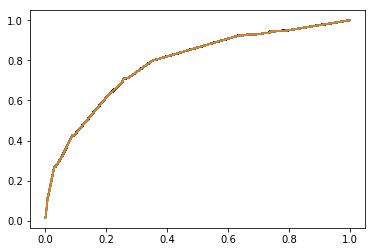

In [94]:
roc_curve(probability,y_test)